### 1 . Thực hiện với data after_preprocess_no_categorical.csv

In [30]:
import pandas as pd

df_no = pd.read_csv("../data/after_preprocess_no_categorical.csv")

df_no.head()

,BMI,Weight (kg),Calories,Height (m),Burns Calories (per 30 min),Water_Intake (liters),Fat_Percentage
0,-0.007712,-0.407549,-0.403077,-0.811571,-0.045632,-1.864510,26.800377
1,-0.215145,-0.826017,-0.825681,-1.362623,0.408037,-1.203034,27.655021
2,-0.562857,-0.704633,-0.768472,-0.417962,0.484893,-1.236108,24.320821
3,1.123469,0.939010,1.167388,-0.181796,0.236589,-0.210821,32.813572
4,-1.506005,-1.014469,-1.023142,1.235196,-0.456983,0.467191,17.307319


Chọn random_state = 15 vì ngày thực hiện là ngày 15

In [31]:
from sklearn.model_selection import train_test_split

X = df_no.drop("Fat_Percentage", axis=1)
y = df_no['Fat_Percentage']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
) 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from tqdm import tqdm

r_train = []
# mse_train = []

r_test = []
# mse_test = []

order = [i+1 for i in range(5)]
for i in tqdm(order):
    model = Pipeline(steps=[
            ("poly", PolynomialFeatures(degree=i, include_bias=False)),
            ("reg", LinearRegression())
        ])
    
    model.fit(x_train, y_train)
    r_train.append(model.score(x_train, y_train))
    r_test.append(model.score(x_test, y_test))

100%|██████████| 5/5 [00:00<00:00,  7.51it/s]


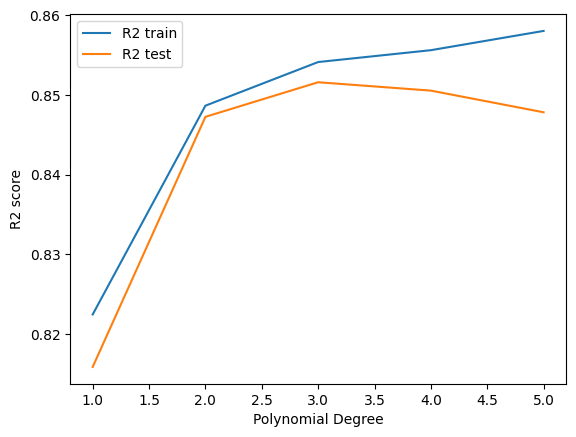

In [33]:
import matplotlib.pyplot as plt

plt.plot(order, r_train, label='R2 train')
plt.plot(order, r_test, label='R2 test')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 score')

plt.legend()

Nhìn vào hình trên có thể thấy rằng bậc tốt nhất cho bài toán này là bậc 3

In [34]:
model = Pipeline(steps=[
        ("poly", PolynomialFeatures(degree=3, include_bias=False)),
        ("reg", LinearRegression())
    ])

model.fit(x_train, y_train)

print("\nIntercept (w0):", model.named_steps["reg"].intercept_)
print("\nCoefficients (w1..wm):")
print(model.named_steps["reg"].coef_)


Intercept (w0): 26.338912801927698

Coefficients (w1..wm):
[-1.87732990e+01  2.67258076e+01 -8.66084813e-01 -1.32222189e+01
  1.41418627e-01 -8.58890073e-02 -2.86251870e+01  4.55223429e+01
  6.22379227e+00 -1.54247916e+01  9.42941908e+00  3.04446145e+01
 -1.59361171e+01 -7.37672010e+00  4.51839870e+00 -9.80054446e+00
 -3.22313416e+01  4.24648540e-01  3.46657296e+00 -1.55691662e-01
 -1.51067767e-01  1.41233934e+00  5.23784177e+00  1.66802360e+01
  3.06889279e-02 -2.96693309e-02 -1.22346443e-02 -4.11165798e+00
  1.37220684e+01 -1.78232422e-01 -1.31410620e+01  9.39035984e-01
  2.22286658e+00 -1.86582939e+01  5.56858842e+00  2.17169340e+01
 -1.32484691e+00 -5.48159112e+00 -2.44217833e+00  1.34516475e+00
 -5.00930124e-01  7.47229637e-01 -6.73667815e+00  2.19011315e+00
  6.22984484e+00  1.10635393e-01 -2.43318483e-01  1.54519599e-01
  7.43109558e+00 -9.85555716e-01 -1.23183188e+01  3.50835705e-01
  2.88476273e+00 -2.38275906e+00  2.92216284e+00  3.84029729e-01
  1.04325835e-01  6.99452270e+

Thực hiện cross-validation

In [36]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=15)

r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train = X.iloc[train_idx]
    X_val   = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val   = y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # acc = accuracy_score(y_val, y_pred)
    r2_scores.append(model.score(X_val, y_val))

print("R2 score từng fold:", r2_scores)
print("R2 score trung bình:", np.mean(r2_scores))

R2 score từng fold: [0.8516011260616819, 0.8577161834894662, 0.8513608685151113, 0.8518197209644791, 0.8504623579137547]
R2 score trung bình: 0.8525920513888987


### 2 . Thực hiện với data after_preprocess_with_categorical.csv

In [38]:
df_with = pd.read_csv("../data/after_preprocess_with_categorical.csv")

df_with.head()

,BMI,Weight (kg),Calories,Height (m),Burns Calories (per 30 min),Water_Intake (liters),Gender,Difficulty Level,Burns_Calories_Bin,ohe__Workout_Type_Cardio,...,pull-up bar,barbell,low bar,trx,bench,sturdy surface,kettlebell,platform,dumbbell,Fat_Percentage
0,-0.007712,-0.407549,-0.403077,-0.811571,-0.045632,-1.864510,1,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,26.800377
1,-0.215145,-0.826017,-0.825681,-1.362623,0.408037,-1.203034,0,1.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,27.655021
2,-0.562857,-0.704633,-0.768472,-0.417962,0.484893,-1.236108,0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,24.320821
3,1.123469,0.939010,1.167388,-0.181796,0.236589,-0.210821,0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,32.813572
4,-1.506005,-1.014469,-1.023142,1.235196,-0.456983,0.467191,1,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,17.307319


In [39]:
X = df_with.drop("Fat_Percentage", axis=1)
y = df_with['Fat_Percentage']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
) 

In [ ]:
r_train = []
# mse_train = []

r_test = []
# mse_test = []

order = [i+1 for i in range(5)]
for i in tqdm(order):
    model = Pipeline(steps=[
            ("poly", PolynomialFeatures(degree=i, include_bias=False)),
            ("reg", LinearRegression())
        ])
    
    model.fit(x_train, y_train)
    r_train.append(model.score(x_train, y_train))
    r_test.append(model.score(x_test, y_test))

print(r_train)
print(r_test)

 40%|████      | 2/5 [00:28<00:43, 14.40s/it]